# Model Regularization
In machine learning, possibly __the most important aspect__ of model developing and training a model is __avoiding overfit__.

When a model overfits to the training dataset, the developed model may not perform strongly in practice. Though it might have achieved possibly a high accuracy with the testing dataset, the model had tried hard to fit to the noise and outliers in the training dataset.

A second reason why the model would not perform strong in practice is that simply the new, never-seen-before test data was not known in the training dataset. Thus they were never learned.

Our concern of model overfitting is as in the former and possible remedies are:
* Ensemble learning
* Cleaning/pre-processing the input data to remove outliers, noise, and use less number of features/dimensions in the model
* Regularization
* Abstraction

## Regularization
Recall that in ensemble learning module, we have built a set of "simpler" Naive Bayes (NB) models where we used a subset of the input dataset features. A set of $M$ models were trained (each not using one of the features) and their outputs were weight-majority voted (using the target probabilities). The idea was when we use __less features__ the model would be __simpler__. Now consider an analogy where we attempt to build a __simpler__ Neural Network (NN) by applying two strategies:
1. Penalizing the sum of weights of layers, aka regularization
2. Dropping some network vertices randomly, aka drop-out ratio

The idea behind adding the L1 or L2 norm of weights to the cost function simply forces the optimizer to use smaller weights to the next layer output. Recall the perceptron equation: $y=w^{\top} x+b$

Penalizing weights is in effect similar to the NB exercise and pushing the training to skip some features or use less number of features.

NN __regularization__ can be realized by adding an additional cost term based on the weights in the cost function which is optimized by Gradient Descent (GD) at each input batch to the NN training.

$\mathrm{L} 1: \lambda\|w\|_{1}=\lambda \sum_{j=1}^{m}\left|w_{j}\right|$

$\mathrm{L} 2: \lambda\|w\|_{2}^{2}=\lambda \sum_{j=1}^{m} w_{j}^{2}$

The hyperparameter $\lambda$ is the regularization parameter. L2 regularization is referred to as __weight decay__ since this cost forces the weights to diminish towards zero. When there are important features that explains the data (i.e. classification error is diminished), those weights will remain higher but other features' weights are suppressed by the optimized cost function. In a way we lose some features by havong their weights as 0 in the NN with regularization.

* Some Machine Learning developers consider L1 more robust than L2 (robustness means resistant to outliers in the data).
* L1 generates more unstable solutions than L2 (remember that NN training solves an optimization problem with Gradient Descent).
* L2 cost function is a convex function but L1 is not (note that convex functions have unique global optimums).

Due to these reasons L2 is more popular.

Referring to the Multilayer Perceptron Jupyter notebook, the L2 term can be added to the cost in the `compute_cost` function, such as: `grad_w_h += 0.01 * sum(abs(self.w_h))`
 
---
 
## Decision Tree Pruning
Decision tree post-pruning is the process of reducing the complexity of the raised tree by removing subtrees which carry less information in the model. Two major approaches are,
* Subtree replacement - Each node is replaced with its most popular class and tested for accuracy
* Subtree raising - A lower node is raised to cover for its parent

Below example shows two trees generated on the Iris dataset without and with pruning and a simpler (more abstract) tree is preferred over the complex one.

Note that `min_samples_leaf` parameter can also be used to achieve direct pruning.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

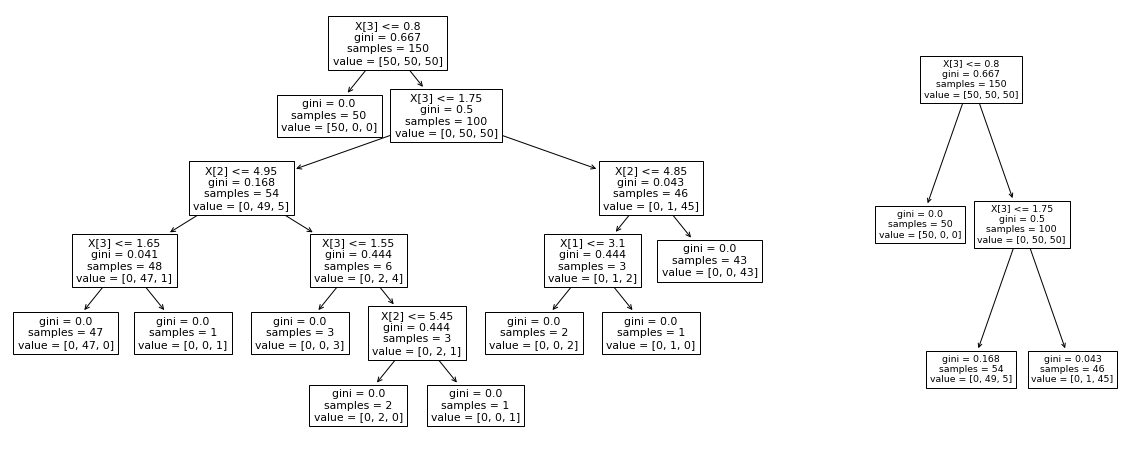

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree

# Alpha beta pruning constant
Alpha = 0.1

iris = load_iris()
X, y = iris.data, iris.target

clf1 = tree.DecisionTreeClassifier(random_state=0).fit(X, y)
clf2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=Alpha).fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), gridspec_kw={'width_ratios': [3, 1]})
tree.plot_tree(clf1, ax=ax[0])
tree.plot_tree(clf2, ax=ax[1])

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
    
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

clf1 = tree.DecisionTreeClassifier(random_state=0).fit(X_tr, y_tr)
clf2 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=Alpha).fit(X_tr, y_tr)

print(f'DT1 accuracy= {accuracy_score(y_ts, clf1.predict(X_ts)):.2f}')
print(f'DT2 (pruned) accuracy= {accuracy_score(y_ts, clf2.predict(X_ts)):.2f}')

DT1 accuracy= 0.89
DT2 (pruned) accuracy= 0.93


## Neural Network Dropout
Simply, dropping neural network nodes can help reduce overfitting. Ref: Srivastava, Nitish, et al. "Dropout: a simple way to prevent neural networks from overfitting." The Journal of Machine Learning Research 15.1 (2014): 1929-1958.

The following NN shows $a_2^{(h1)}$ and $a_3^{(h2)}$ nodes as not used, dropped. Normally dropout is applied randomly to hidden layers during training. A random dropout is applied at each batch. The effect of random dropout forces the NN to learn models redundantly since a single node cannot be reliably counted on.

Clearly, it is expected the training take a longer time when dropout is used.

Dropout feature is not available with the `scikit-learn` library `MLPClassifier` function.

Tensorflow has the dropout feature through `h1_d = tf.nn.dropout(h1, dropout_p)` function.

---

## Overfit Demonstration
Consider the following three SVM classifiers for a dramatic representation of overfitting. The first and last classifiers are either too general or too overfitted. The second classifier, despite making more mistakes than the third, is a better model due to its higher generalization ability.

In the code below, try different schemes by changing the input data points $X \in \mathbb{R}^{12 \times 2}$ and 2 classes and see how the decision boundary is changing. Note that the second and the third classifiers are both RBF kernels with gamma set to 0.05 and 0.5, respectively. The gamma parameters has control over the wiggling of the decision boundary set by the RBF kernel.

In [5]:
# Training data, 12 data points
X = np.array([
    [15, 11, 10.5, 12, 11.5, 15,      11.5, 14, 14.5, 12.5, 16, 17], 
    [10, 11, 13, 14, 16, 18,          12, 13, 15, 16.2, 11.5, 14]]).T

y = np.array([0, 0, 0, 0, 0, 0,       1, 1, 1, 1, 1, 1])

In [7]:
from sklearn import svm

# For the nicer plot
def get_minmax(_m, _X):
    return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m

# Draw the linear decision boundary of an SVC easily
def svc_linear(_X, _y, _ax, color_db='r'):
    clf = svm.SVC(kernel='linear', C=10).fit(_X, _y)
    # dividing hyperplane
    a = -clf.coef_[0][0] / clf.coef_[0][1]
    x1_min, x1_max, _, _ = get_minmax(1, _X)
    x1_plot = np.linspace(x1_min, x1_max)
    x2_plot = a*x1_plot - clf.intercept_[0]/clf.coef_[0][1]
    _ax.plot(x1_plot, x2_plot, linestyle='--', color=color_db, linewidth=2)
    return clf

In [11]:
# We will find the decision boundary with a mesh plot
def svc_rbf(_X, _y, _ax, _gamma, color_db='r'):
    clf = svm.SVC(kernel='rbf', gamma=_gamma, C=10).fit(_X, _y)
    plot_decisionboundary(_ax, 0.01, _X, clf, color_db)
    return clf

# Plot the decision boundary of a classifier using mesh and contour, 2-dims
def plot_decisionboundary(_ax, _h, _X, _clf, color_db='r'):  # h = step size in the mesh
    x1_min, x1_max, x2_min, x2_max = get_minmax(1, _X)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, _h), np.arange(x2_min, x2_max, _h))
    Y = _clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    _ax.contour(xx1, xx2, Y, colors=color_db, linestyles='dashed')

In [9]:
# Plot the data points
def plotX(_ax, X, y):
    _ax.scatter(X[y==0,0], X[y==0,1], marker='o', color='darkorchid', s=50)
    _ax.scatter(X[y==1,0], X[y==1,1], marker='+', color='darkgreen', s=90)
    if _ax is not None:
        _ax.get_xaxis().set_ticks([])
        _ax.get_yaxis().set_ticks([])
    _ax.set_xlim(X[:,0].min()-1, X[:,0].max()+1)
    _ax.set_ylim(X[:,1].min()-1, X[:,1].max()+1)
    _ax.set_xlabel(r'$x_1$', horizontalalignment='right', x=1.0)
    _ax.set_ylabel(r'$x_2$', horizontalalignment='right', y=1.0)

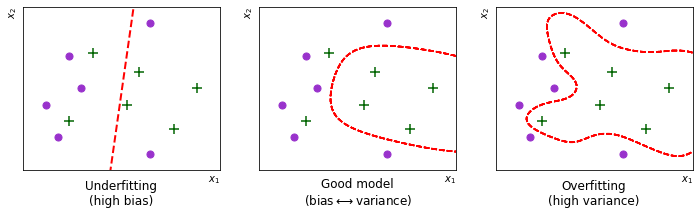

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(12, 3))

plotX(ax[0], X, y)
svc_linear(X, y, ax[0])
ax[0].set_title('Underfitting\n(high bias)', y=-0.25)

plotX(ax[1], X, y)
svc_rbf(X, y, ax[1], 0.05)
ax[1].set_title('Good model\n(bias$\longleftrightarrow$variance)', y=-0.25)

plotX(ax[2], X, y)
svc_rbf(X, y, ax[2], 0.5)
ax[2].set_title('Overfitting\n(high variance)', y=-0.25)

plt.show()

Note that these decision curves are generated by passing  $[x_1,x_2]$  data points as a mesh with a granularity of  0.01 . Each data point is then checked for prediction by the model and a contour is generated on the outcomes $y$ (which are either 0 or 1).

Now, let's see training re-classification and testing performances. Added a test of 4 data points, marked with star (ground truth circle class) and cross (ground truth plus class) in red color below.

In [13]:
# Test data points
X_test = np.array([
    [13, 12,      13, 13.3], 
    [12.5, 13,    14, 13.7]]).T

y_test = np.array([0, 0, 1, 1])

In [14]:
# Plot test data points
def plotXtest(_ax, _X, _y):
    _ax.scatter(_X[_y==0,0], _X[_y==0,1], marker='*', color='r', s=50)
    _ax.scatter(_X[_y==1,0], _X[_y==1,1], marker='x', color='r', s=50)

def accuracy(_clf, _X, _y):  # percent
    return ((np.sum(_y==_clf.predict(_X))).astype(np.float)/_y.shape[0])*100

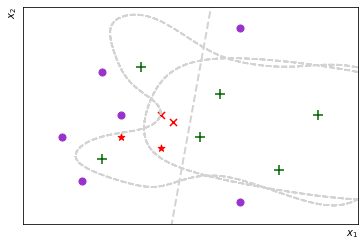

SVC 1 Reclassification Acc= 66.7%
SVC 2 Reclassification Acc= 83.3%
SVC 3 Reclassification Acc= 100.0%
SVC 1 Test Acc= 50.0%
SVC 2 Test Acc= 75.0%
SVC 3 Test Acc= 50.0%


In [15]:
ax = plt.gca()
    
plotX(ax, X, y)

plotXtest(ax, X_test, y_test)

clf1 = svc_linear(X, y, ax, color_db='lightgray')
clf2 = svc_rbf(X, y, ax, 0.05, color_db='lightgray')
clf3 = svc_rbf(X, y, ax, 0.5, color_db='lightgray')

plt.show()

print(f'SVC 1 Reclassification Acc= {accuracy(clf1, X, y):.1f}%')
print(f'SVC 2 Reclassification Acc= {accuracy(clf2, X, y):.1f}%')
print(f'SVC 3 Reclassification Acc= {accuracy(clf3, X, y):.1f}%')
print(f'SVC 1 Test Acc= {accuracy(clf1, X_test, y_test):.1f}%')
print(f'SVC 2 Test Acc= {accuracy(clf2, X_test, y_test):.1f}%')
print(f'SVC 3 Test Acc= {accuracy(clf3, X_test, y_test):.1f}%')

In the plot above, 4 data points marked in color red constitute the test dataset. Clearly, the test data is manually created, but then can you disagree with those 4 data points? The locations of those data points can easily happen in practice. As a result, the higher generalized model has the better test performance. Let's also check their reclassification performances.

__Interesting!__ The more general model has a higher test performance and a medium reclassification performance.

---

Now let's see an example Multilayer Perceptron classifier with L2 regularization. The hyperparameter `alpha` controls L2 regularization for the library function `MLPClassifier`.

Note that scaling is applied to the MLP classifier. It is also possible to train an MLP to achieve 100% test accuracy.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X_tr = StandardScaler().fit_transform(X)
X_ts = StandardScaler().fit_transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes=(5,), alpha=0, random_state=1, max_iter=10000).fit(X_tr,y)
mlp2 = MLPClassifier(hidden_layer_sizes=(5,), alpha=1, random_state=1, max_iter=10000).fit(X_tr,y)

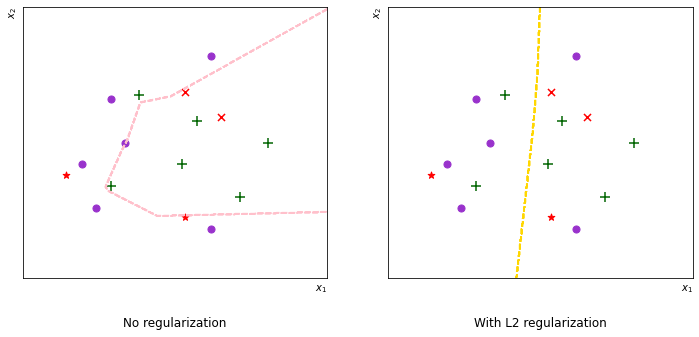

MLP 1 Reclassification Acc= 91.7%
MLP 2 Reclassification Acc= 66.7%
MLP 1 Test Acc= 100.0%
MLP 2 Test Acc= 75.0%


In [17]:
plt.figure(figsize=(12, 5))

ax=plt.subplot(1, 2, 1)
plotX(ax, X_tr, y)
plotXtest(ax, X_ts, y_test)
plot_decisionboundary(ax, 0.01, X_tr, mlp1, 'pink')
plt.title('No regularization', y=-0.20)

ax=plt.subplot(1, 2, 2)
plotX(ax, X_tr, y)
plotXtest(ax, X_ts, y_test)
plot_decisionboundary(ax, 0.01, X_tr, mlp2, 'gold')
plt.title('With L2 regularization', y=-0.20)
plt.show()

print(f'MLP 1 Reclassification Acc= {accuracy(mlp1, X_tr, y):.1f}%')
print(f'MLP 2 Reclassification Acc= {accuracy(mlp2, X_tr, y):.1f}%')
print(f'MLP 1 Test Acc= {accuracy(mlp1, X_ts, y_test):.1f}%')
print(f'MLP 2 Test Acc= {accuracy(mlp2, X_ts, y_test):.1f}%')


__Question:__ Which model do you prefer more, left or right?